In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

1.1 ЗАГРУЗКА ДАННЫХ

Данные загружены. Представлен код по загрузке, отражено в отчете. Результаты очищены от технической информации, отражено в отчете.

1.2 ПРЕДОБРАБОТКА ДАННЫХ

Необходимо проанализировать значения атрибутов датасета, проанализировать значения, которыми заполнены признаки и обработать их при необходимости, отразить в отчете.

# Модуль 1

## 1.1 ЗАГРУЗКА ДАННЫХ

In [107]:
df = pd.read_csv("real_estate_data.csv")

In [108]:
df.head()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


In [109]:
df.tail()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
403482,403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,NaN,48000.0,EUR
403485,403486,Konut,Daire,2/21/19,NaN,2,6,NaN,NaN,NaN,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,NaN,900.0,TRY
403486,403487,Konut,Daire,1/15/19,1/18/19,1,3,NaN,NaN,NaN,3+1,140.0,Kayseri/Melikgazi/Alpaslan,NaN,NaN,210000.0,TRY


Данные были загружены, код представлен

## 1.2 ПРЕДОБРАБОТКА ДАННЫХ


In [110]:
df.shape

(403487, 17)

In [111]:
df['tom'].max()

180

In [112]:
df['tom'].min()

0

In [113]:
df['tom'].value_counts()

30     82216
60     22325
0      11151
90      9868
61      6738
       ...  
143      313
157      287
164      210
178      196
171      158
Name: tom, Length: 181, dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

Имеем 3 признака с типом данных float64, 3 признака с типо данных int64 и 11 признаков с типом данных object.

Также можно заметить, что столбец furnished (мебельный) полностью заполнен пропусками данных (NaN)

Давайте проверим количество пустых значений в остальных столбцах

In [115]:
df.isna().sum()

id                        0
type                      0
sub_type                  0
start_date                0
end_date             137189
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
floor_no              35296
room_count                0
size                 146006
address                   0
furnished            403487
heating_type          27970
price                   715
price_currency          715
dtype: int64

Удалим столбец furnished, т.к. в нем много NAN

In [116]:
df.drop("furnished", axis = 1, inplace = True)

Столбцы с датами преобразуем в формат даты

In [117]:
df["end_date"] = pd.to_datetime(df["end_date"])
df["start_date"] = pd.to_datetime(df["start_date"])

Остальные столбцы будем обрабатывать и приводить к нужному виду

In [118]:
df["total_floor_count"].value_counts()

4              83082
3              77956
5              70104
10-20 arası    36512
2              27742
6              23348
10             12558
7              12284
8              11207
9               9029
20 ve üzeri     6679
1               4965
Name: total_floor_count, dtype: int64

 Столбец total_floor_count обработаем с помощью замены строк на числовой формат

In [119]:
df["total_floor_count"].replace("10-20 arası", 15, inplace = True) # заменяем строку 10-20 на 15

In [120]:
df["total_floor_count"].value_counts()

4              83082
3              77956
5              70104
15             36512
2              27742
6              23348
10             12558
7              12284
8              11207
9               9029
20 ve üzeri     6679
1               4965
Name: total_floor_count, dtype: int64

In [121]:
df["total_floor_count"].replace("20 ve üzeri", 20, inplace = True) # заменяем строку 20 ve uzeri на 20

In [122]:
# заменяем пустые значения
df["total_floor_count"].fillna(df["total_floor_count"].median(), inplace = True)

In [123]:
df["total_floor_count"] = df["total_floor_count"].astype("int64") # поменяли тип столбца

In [124]:
df["total_floor_count"].value_counts()

4     111103
3      77956
5      70104
15     36512
2      27742
6      23348
10     12558
7      12284
8      11207
9       9029
20      6679
1       4965
Name: total_floor_count, dtype: int64

In [125]:
df["total_floor_count"].max()

20

In [126]:
df["total_floor_count"].min()

1

Обработали столбец количества этажей

Перейдем к обработке столбца building_age

In [127]:
df["building_age"].value_counts() # смотрим распределение переменной

0              140174
6-10 arası      50495
11-15 arası     32309
16-20 arası     31333
1               20355
4               19032
21-25 arası     18438
2               17466
3               15651
5               13589
26-30 arası     10581
31-35 arası      4268
36-40 arası      1347
40 ve üzeri      1059
Name: building_age, dtype: int64

In [128]:
df["building_age"].replace("6-10 arası", 8, inplace = True)
df["building_age"].replace("11-15 arası", 13, inplace = True)
df["building_age"].replace("16-20 arası", 18, inplace = True)
df["building_age"].replace("21-25 arası", 23, inplace = True)
df["building_age"].replace("26-30 arası", 28, inplace = True)
df["building_age"].replace("31-35 arası", 33, inplace = True)
df["building_age"].replace("36-40 arası", 38, inplace = True)
df["building_age"].replace("40 ve üzeri", 40, inplace = True)

In [129]:
df["building_age"].value_counts()

0     140174
8      50495
13     32309
18     31333
1      20355
4      19032
23     18438
2      17466
3      15651
5      13589
28     10581
33      4268
38      1347
40      1059
Name: building_age, dtype: int64

Обработали столбец возраст здания

Переходим к столбцу floor_no

In [130]:
df["floor_no"].value_counts()

2               60914
3               32200
1               28569
Yüksek Giriş    24045
Müstakil        21165
4               21049
3               20490
Bahçe katı      19065
1               18187
4               13416
5               12495
Giriş Katı      10431
5                8698
6                5116
Kot 1            5036
Kot 2            4987
2                4950
9                4855
6                4631
8                4608
7                4398
10               3863
Kot 3            3793
Çatı Katı        3566
Zemin Kat        3441
7                3300
Komple           2958
11               2894
12               2308
Kot 4            2269
13               1702
20 ve üzeri      1563
8                1491
14               1328
15                911
En Üst Kat        894
Bodrum Kat        815
16                600
17                373
18                334
Teras Kat         293
19                177
Asma Kat           12
12                  1
Name: floor_no, dtype: int64

In [131]:
from sklearn.preprocessing import LabelEncoder

In [132]:
le = LabelEncoder()

In [133]:
df["floor_no"] = le.fit_transform(df["floor_no"].astype(str)) # кодируем столбец

In [134]:
np.save('floor_no_classes.npy', le.classes_)

In [135]:
df["floor_no"].value_counts()

11    65864
13    52690
0     46756
34    35296
14    34465
32    24045
15    21193
30    21165
21    19065
24    10431
16     9747
17     7698
18     6099
26     5036
27     4987
19     4855
1      3863
28     3793
35     3566
33     3441
25     2958
2      2894
3      2309
29     2269
4      1702
12     1563
5      1328
6       911
23      894
22      815
7       600
8       373
9       334
31      293
10      177
20       12
Name: floor_no, dtype: int64

In [136]:
le.classes_

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20 ve üzeri', '3', '4', '5', '6', '7', '8', '9', 'Asma Kat',
       'Bahçe katı', 'Bodrum Kat', 'En Üst Kat', 'Giriş Katı', 'Komple',
       'Kot 1', 'Kot 2', 'Kot 3', 'Kot 4', 'Müstakil', 'Teras Kat',
       'Yüksek Giriş', 'Zemin Kat', 'nan', 'Çatı Katı'], dtype=object)

In [137]:
print(dict(enumerate(le.classes_)))

{0: '1', 1: '10', 2: '11', 3: '12', 4: '13', 5: '14', 6: '15', 7: '16', 8: '17', 9: '18', 10: '19', 11: '2', 12: '20 ve üzeri', 13: '3', 14: '4', 15: '5', 16: '6', 17: '7', 18: '8', 19: '9', 20: 'Asma Kat', 21: 'Bahçe katı', 22: 'Bodrum Kat', 23: 'En Üst Kat', 24: 'Giriş Katı', 25: 'Komple', 26: 'Kot 1', 27: 'Kot 2', 28: 'Kot 3', 29: 'Kot 4', 30: 'Müstakil', 31: 'Teras Kat', 32: 'Yüksek Giriş', 33: 'Zemin Kat', 34: 'nan', 35: 'Çatı Katı'}


In [138]:
le.__dict__

{'classes_': array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
        '2', '20 ve üzeri', '3', '4', '5', '6', '7', '8', '9', 'Asma Kat',
        'Bahçe katı', 'Bodrum Kat', 'En Üst Kat', 'Giriş Katı', 'Komple',
        'Kot 1', 'Kot 2', 'Kot 3', 'Kot 4', 'Müstakil', 'Teras Kat',
        'Yüksek Giriş', 'Zemin Kat', 'nan', 'Çatı Katı'], dtype=object)}

In [139]:
le.get_params()

{}

In [140]:
le.__weakref__

In [141]:
help(LabelEncoder)

Help on class LabelEncoder in module sklearn.preprocessing._label:

class LabelEncoder(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Encode target labels with value between 0 and n_classes-1.
 |  
 |  This transformer should be used to encode target values, *i.e.* `y`, and
 |  not the input `X`.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_targets>`.
 |  
 |  .. versionadded:: 0.12
 |  
 |  Attributes
 |  ----------
 |  classes_ : ndarray of shape (n_classes,)
 |      Holds the label for each class.
 |  
 |  Examples
 |  --------
 |  `LabelEncoder` can be used to normalize labels.
 |  
 |  >>> from sklearn import preprocessing
 |  >>> le = preprocessing.LabelEncoder()
 |  >>> le.fit([1, 2, 2, 6])
 |  LabelEncoder()
 |  >>> le.classes_
 |  array([1, 2, 6])
 |  >>> le.transform([1, 1, 2, 6])
 |  array([0, 0, 1, 2]...)
 |  >>> le.inverse_transform([0, 0, 1, 2])
 |  array([1, 1, 2, 6])
 |  
 |  It can also be used to transform non-numerical labels (as long as 

Переходим к следующему признаку - size

In [142]:
df["size"].value_counts()

90.0      16803
100.0     16234
120.0     15543
110.0     13546
80.0      11094
          ...  
2390.0        1
477.0         1
647.0         1
428.0         1
8275.0        1
Name: size, Length: 943, dtype: int64

<AxesSubplot:>

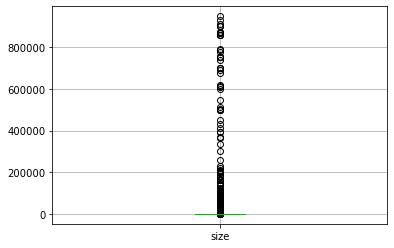

In [143]:
df.boxplot("size")

In [144]:
quant = df["size"].quantile(0.9)# считаем квантиль 90 %
quant_low = df["size"].quantile(0.1)# считаем квантиль 10 %

In [145]:
df_new = df[df["size"] < quant] # убираем выбросы по квантилю
df_new = df_new[df_new["size"] > quant_low] # убираем выбросы по квантилю

<AxesSubplot:>

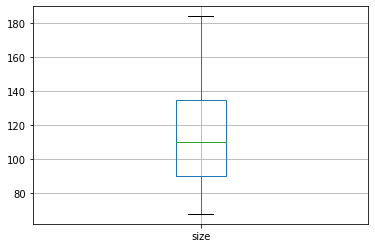

In [146]:
df_new.boxplot("size") # строим ящик с усами и показываем, что выбросов практически нет

In [147]:
df_new[df_new["size"] < quant]["size"].max() # считаем максимум

184.0

In [148]:
df_new["size"].value_counts()

90.0     16803
100.0    16234
120.0    15543
110.0    13546
80.0     11094
         ...  
141.0       54
173.0       52
182.0       49
171.0       36
181.0       26
Name: size, Length: 117, dtype: int64

In [149]:
df_new["size"].unique()

array([ 90., 160., 140., 125., 165.,  85.,  84., 100.,  70., 158., 105.,
       150., 120.,  68., 180., 173., 130., 112., 155., 170.,  80., 136.,
        86., 157., 135., 104., 145., 110.,  97.,  75.,  87., 134., 168.,
       161., 142., 111., 175., 115.,  93.,  95., 108., 122.,  76., 117.,
        99., 162., 102., 126., 184.,  77.,  88.,  96., 151., 118., 124.,
       106.,  98., 139., 129., 149., 148.,  78., 123., 131.,  69.,  79.,
       137., 147., 133.,  73.,  89.,  72., 143., 119.,  82., 128., 178.,
        74.,  92., 132., 146., 141., 114., 121., 138., 176.,  91., 179.,
       103., 152.,  81., 116., 127., 164.,  83., 156.,  94., 159., 113.,
       169., 177., 163., 109., 154., 174., 153., 144., 107., 183., 101.,
       172., 167.,  71., 171., 182., 166., 181.])

In [150]:
df_new["size"].min()

68.0

In [151]:
df_new.isna().sum() # пустых значений нет

id                       0
type                     0
sub_type                 0
start_date               0
end_date             79271
listing_type             0
tom                      0
building_age         10048
total_floor_count        0
floor_no                 0
room_count               0
size                     0
address                  0
heating_type         10060
price                   87
price_currency          87
dtype: int64

In [152]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205562 entries, 0 to 403486
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 205562 non-null  int64         
 1   type               205562 non-null  object        
 2   sub_type           205562 non-null  object        
 3   start_date         205562 non-null  datetime64[ns]
 4   end_date           126291 non-null  datetime64[ns]
 5   listing_type       205562 non-null  int64         
 6   tom                205562 non-null  int64         
 7   building_age       195514 non-null  object        
 8   total_floor_count  205562 non-null  int64         
 9   floor_no           205562 non-null  int32         
 10  room_count         205562 non-null  object        
 11  size               205562 non-null  float64       
 12  address            205562 non-null  object        
 13  heating_type       195502 non-null  object  

In [153]:
df_new["heating_type"].value_counts()

Kombi (Doğalgaz)                   108393
Klima                               34552
Merkezi Sistem (Isı Payı Ölçer)     15281
Merkezi Sistem                      11682
Kalorifer (Doğalgaz)                 6454
Soba (Kömür)                         4470
Yerden Isıtma                        2934
Yok                                  2896
Kat Kaloriferi                       2827
Kombi (Elektrikli)                   1792
Soba (Doğalgaz)                      1489
Güneş Enerjisi                        875
Jeotermal                             779
Kalorifer (Kömür)                     738
Kalorifer (Akaryakıt)                 183
Fancoil                               157
Name: heating_type, dtype: int64

In [154]:
df_new["heating_type"].fillna("Kombi (Doğalgaz)", inplace = True) # заменяем пропуски на часто встречаемое

In [155]:
df_new["heating_type"] = le.fit_transform(df_new["heating_type"]) # кодируем переменную кодировщиком

In [156]:
le.classes_

array(['Fancoil', 'Güneş Enerjisi', 'Jeotermal', 'Kalorifer (Akaryakıt)',
       'Kalorifer (Doğalgaz)', 'Kalorifer (Kömür)', 'Kat Kaloriferi',
       'Klima', 'Kombi (Doğalgaz)', 'Kombi (Elektrikli)',
       'Merkezi Sistem', 'Merkezi Sistem (Isı Payı Ölçer)',
       'Soba (Doğalgaz)', 'Soba (Kömür)', 'Yerden Isıtma', 'Yok'],
      dtype=object)

In [157]:
np.save('heating_type_classes.npy', le.classes_)

In [158]:
dict(enumerate(le.classes_))

{0: 'Fancoil',
 1: 'Güneş Enerjisi',
 2: 'Jeotermal',
 3: 'Kalorifer (Akaryakıt)',
 4: 'Kalorifer (Doğalgaz)',
 5: 'Kalorifer (Kömür)',
 6: 'Kat Kaloriferi',
 7: 'Klima',
 8: 'Kombi (Doğalgaz)',
 9: 'Kombi (Elektrikli)',
 10: 'Merkezi Sistem',
 11: 'Merkezi Sistem (Isı Payı Ölçer)',
 12: 'Soba (Doğalgaz)',
 13: 'Soba (Kömür)',
 14: 'Yerden Isıtma',
 15: 'Yok'}

In [159]:
print(dict([(value, key) for (key, value) in dict(enumerate(le.classes_)).items()]))

{'Fancoil': 0, 'Güneş Enerjisi': 1, 'Jeotermal': 2, 'Kalorifer (Akaryakıt)': 3, 'Kalorifer (Doğalgaz)': 4, 'Kalorifer (Kömür)': 5, 'Kat Kaloriferi': 6, 'Klima': 7, 'Kombi (Doğalgaz)': 8, 'Kombi (Elektrikli)': 9, 'Merkezi Sistem': 10, 'Merkezi Sistem (Isı Payı Ölçer)': 11, 'Soba (Doğalgaz)': 12, 'Soba (Kömür)': 13, 'Yerden Isıtma': 14, 'Yok': 15}


In [160]:
df_new["heating_type"].value_counts()

8     118453
7      34552
11     15281
10     11682
4       6454
13      4470
14      2934
15      2896
6       2827
9       1792
12      1489
1        875
2        779
5        738
3        183
0        157
Name: heating_type, dtype: int64

Переходим к признаку price

In [161]:
df_new['price'].value_counts()

1000.0      4461
1500.0      3029
1200.0      2920
1100.0      2714
800.0       2625
            ... 
589999.0       1
295900.0       1
278750.0       1
1795.0         1
229700.0       1
Name: price, Length: 2441, dtype: int64

In [162]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
id,205562.0,198511.747293,1.132425e+05,1.0,101446.5,199564.5,293381.75,403487.0
listing_type,205562.0,1.282148,4.574334e-01,1.0,1.0,1.0,2.00,3.0
tom,205562.0,47.001455,3.557690e+01,0.0,23.0,30.0,67.00,180.0
total_floor_count,205562.0,5.749832,3.908029e+00,1.0,3.0,4.0,6.00,20.0
floor_no,205562.0,15.846864,1.003525e+01,0.0,11.0,14.0,22.00,35.0
size,205562.0,114.537770,2.859717e+01,68.0,90.0,110.0,135.00,184.0
heating_type,205562.0,8.272302,1.966855e+00,0.0,8.0,8.0,8.00,15.0
price,205475.0,263282.025643,2.674257e+06,-250.0,2600.0,200000.0,320000.00,999999100.0


In [163]:
df_new["price"].fillna(df_new["price"].median(), inplace = True)

In [164]:
quant = df_new["price"].quantile(0.9)# считаем квантиль 90 %
quant_low = df_new["price"].quantile(0.25)# считаем квантиль 10 %

In [165]:
df_new2 = df_new[df_new["price"] < quant] # убираем выбросы по квантилю
df_new2 = df_new2[df_new2["price"] > quant_low] # убираем выбросы по квантилю

In [166]:
df_new2["price"].max()

499999.0

<AxesSubplot:>

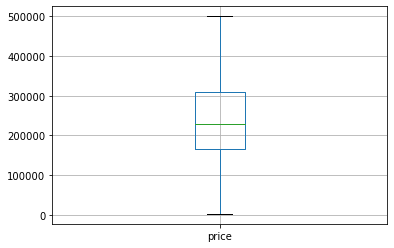

In [167]:
df_new2.boxplot("price")

<AxesSubplot:>

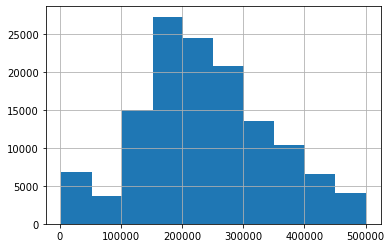

In [168]:
df_new2["price"].hist()

In [169]:
df_new2.shape

(132984, 16)

In [170]:
df_new2["price_currency"].value_counts()

TRY    132475
EUR       192
GBP       191
USD        39
Name: price_currency, dtype: int64

In [171]:
gbp = df_new2[df_new2["price_currency"] == "GBP"]
gbp["price"]  = gbp["price"] * 11.9

In [172]:
usd = df_new2[df_new2["price_currency"] == "USD"]
usd["price"] = usd["price"] * 8.87

In [173]:
eur = df_new2[df_new2["price_currency"] == "EUR"]
eur["price"] = eur["price"] * 10

In [174]:
tryy = df_new2[df_new2["price_currency"] == "TRY"]

In [175]:
df_new3 = pd.concat([gbp, usd, eur, tryy])

In [176]:
df_new3

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
1452,1453,Konut,Müstakil Ev,2019-02-18,NaT,1,9,13,2,30,6+1,140.0,KKTC/İskele/Ergazi Köyü,15,821100.0,GBP
1652,1653,Konut,Daire,2018-11-03,NaT,1,116,2,3,0,2+1,90.0,Aydın/Didim/Efeler,15,551565.0,GBP
2076,2077,Konut,Daire,2018-11-05,NaT,1,114,5,3,0,2+1,90.0,Aydın/Didim/Efeler,15,612850.0,GBP
2295,2296,Konut,Müstakil Ev,2018-10-05,NaT,1,145,0,1,30,2+1,90.0,KKTC/İskele/Bafra Köyü,15,416500.0,GBP
2387,2388,Konut,Müstakil Ev,2018-11-06,NaT,1,113,23,1,0,2+1,80.0,KKTC/İskele/Sipahi Köyü,15,690200.0,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403434,403435,Konut,Daire,2018-12-24,NaT,1,65,NaN,4,34,3+1,135.0,Kayseri/Melikgazi/Gesi Fatih,8,229000.0,TRY
403438,403439,Konut,Daire,2019-02-06,NaT,1,21,NaN,4,34,2+1,90.0,İstanbul/Güngören/Gençosman,8,185000.0,TRY
403447,403448,Konut,Daire,2019-02-01,NaT,1,26,NaN,4,34,2+1,90.0,İstanbul/Sancaktepe/Veysel Karani,8,250000.0,TRY
403476,403477,Konut,Daire,2019-02-11,NaT,1,16,NaN,4,34,3+1,110.0,Ankara/Mamak/Araplar,8,200000.0,TRY


Заменим пустые значения самым часто-встречающимся.

In [177]:
df_new3["price_currency"].fillna("TRY", inplace = True)

кодируем значения столбца с помощью LabelEncodera

In [178]:
df_new3["price_currency"] = le.fit_transform(df_new3["price_currency"])

In [179]:
df_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132897 entries, 1452 to 403486
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 132897 non-null  int64         
 1   type               132897 non-null  object        
 2   sub_type           132897 non-null  object        
 3   start_date         132897 non-null  datetime64[ns]
 4   end_date           79774 non-null   datetime64[ns]
 5   listing_type       132897 non-null  int64         
 6   tom                132897 non-null  int64         
 7   building_age       126903 non-null  object        
 8   total_floor_count  132897 non-null  int64         
 9   floor_no           132897 non-null  int32         
 10  room_count         132897 non-null  object        
 11  size               132897 non-null  float64       
 12  address            132897 non-null  object        
 13  heating_type       132897 non-null  int32

Переходим к столбцу type

In [180]:
df_new["type"].value_counts()

Konut    205562
Name: type, dtype: int64

Так как в столбце type лишь одно уникальное значение, мы его можем удалить из данных

In [181]:
df_new3.drop("type", axis = 1, inplace = True)

Переходим к столбцу sub_type

In [182]:
df_new3["sub_type"].value_counts()

Daire                  124181
Villa                    2310
Yazlık                   2167
Müstakil Ev              1937
Rezidans                 1513
Komple Bina               332
Prefabrik Ev              305
Kooperatif                 44
Çiftlik Evi                41
Yalı Dairesi               39
Köşk / Konak / Yalı        21
Loft                        7
Name: sub_type, dtype: int64

Закодируем переменную с помощью кодировщика

In [183]:
df_new3["sub_type"] = le.fit_transform(df_new3["sub_type"]) # кодируем переменное

In [184]:
df_new3["sub_type"].value_counts()

0     124181
8       2310
10      2167
5       1937
7       1513
1        332
6        305
2         44
11        41
9         39
3         21
4          7
Name: sub_type, dtype: int64

Переходим к признаку listing_type

Смотрим на распределение по уникальным

In [185]:
df_new3["listing_type"].value_counts()

1    126991
2      5901
3         5
Name: listing_type, dtype: int64

Исходя из того, что есть 3 уникальных значения мы оставляем этот столбец

Переходим к признаку tom

Смотрим на распределение по уникальным

In [186]:
df_new3["tom"].value_counts()

30     29379
60      7901
0       3599
90      3186
61      2451
       ...  
172       19
177       17
179       15
171       11
178        6
Name: tom, Length: 181, dtype: int64

Исходя из того, что есть 181 уникальных значения мы оставляем этот столбец

Переходим к признаку room_count

Смотрим на распределение по уникальным

In [187]:
df_new3["room_count"].value_counts()

3+1     60769
2+1     58862
4+1      7608
1+1      3157
3+2       677
4+2       589
5+1       588
2+2       243
+         180
5+2        79
1+0        45
6+1        43
6+2        15
6+3        12
7+1         8
4+3         8
10+0        5
8+1         2
8+2         2
9+5         1
7+3         1
9+3         1
10+1        1
5+3         1
Name: room_count, dtype: int64

In [188]:
ind = df_new3[df_new3["room_count"] == "+"].index # удалим строки с непонятными значениями "+"

In [189]:
ind

Int64Index([   621,    693,    701,    751,   1085,   1449,   1467,   1693,
              5515,   6855,
            ...
            397216, 397448, 398085, 400456, 400493, 400515, 401362, 401954,
            401996, 402767],
           dtype='int64', length=180)

In [190]:
df_new3.drop(ind, inplace = True)

In [191]:
df_new3.shape

(132717, 15)

In [192]:
df_new3["room_count"].value_counts()

3+1     60769
2+1     58862
4+1      7608
1+1      3157
3+2       677
4+2       589
5+1       588
2+2       243
5+2        79
1+0        45
6+1        43
6+2        15
6+3        12
7+1         8
4+3         8
10+0        5
8+1         2
8+2         2
9+5         1
7+3         1
9+3         1
10+1        1
5+3         1
Name: room_count, dtype: int64

In [193]:
df_new3["room_count"] = le.fit_transform(df_new3["room_count"])

In [194]:
le.classes_

array(['1+0', '1+1', '10+0', '10+1', '2+1', '2+2', '3+1', '3+2', '4+1',
       '4+2', '4+3', '5+1', '5+2', '5+3', '6+1', '6+2', '6+3', '7+1',
       '7+3', '8+1', '8+2', '9+3', '9+5'], dtype=object)

In [195]:
np.save('room_count_classes.npy', le.classes_)

In [169]:
print(dict([(value, key) for (key, value) in dict(enumerate(le.classes_)).items()]))

{'1+0': 0, '1+1': 1, '10+0': 2, '10+1': 3, '2+1': 4, '2+2': 5, '3+1': 6, '3+2': 7, '4+1': 8, '4+2': 9, '4+3': 10, '5+1': 11, '5+2': 12, '5+3': 13, '6+1': 14, '6+2': 15, '6+3': 16, '7+1': 17, '7+3': 18, '8+1': 19, '8+2': 20, '9+3': 21, '9+5': 22}


Закодировали этот признак с помощью Кодировщика

Удалим признак id

In [71]:
df_new3["id"]

1452        1453
1652        1653
2076        2077
2295        2296
2387        2388
           ...  
403434    403435
403438    403439
403447    403448
403476    403477
403486    403487
Name: id, Length: 132717, dtype: int64

In [72]:
df_new3.drop("id", axis = 1, inplace = True)

Переходим к признаку adress

In [73]:
df_new3["address"].value_counts()

Balıkesir/Edremit/Akçay            3284
İstanbul/Beylikdüzü/Cumhuriyet     1905
Aydın/Didim/Efeler                 1776
Aydın/Didim/Hisar                   857
Antalya/Kepez/Varsak Karşıyaka      839
                                   ... 
Malatya/Battalgazi/Selçuklu           1
Çanakkale/Gelibolu/Cevizli Köyü       1
Antalya/Aksu/Karaöz                   1
Osmaniye/Bahçe/Çamlıca                1
Trabzon/Beşikdüzü/Cumhuriyet          1
Name: address, Length: 5698, dtype: int64

В столбце слишком много уникальных значений, что привнесет шум в нашу модель и данные. Необходимо удалить этот столбец

In [74]:
df_new3.drop("address", axis = 1, inplace = True)

In [75]:
df_new3.drop(["start_date", "end_date"], axis = 1, inplace = True)

In [76]:
df_new3.isna().sum()

sub_type                0
listing_type            0
tom                     0
building_age         5957
total_floor_count       0
floor_no                0
room_count              0
size                    0
heating_type            0
price                   0
price_currency          0
dtype: int64

In [77]:
df_new3["building_age"].value_counts()

0     56597
8     15547
18    10013
13     9414
1      6154
23     5817
4      5159
2      4982
3      4367
5      3993
28     3088
33     1095
38      314
40      220
Name: building_age, dtype: int64

In [78]:
df_new3["building_age"] = df_new3["building_age"].fillna(df_new3["building_age"].median()).astype(int)

In [79]:
df_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132717 entries, 1452 to 403486
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_type           132717 non-null  int32  
 1   listing_type       132717 non-null  int64  
 2   tom                132717 non-null  int64  
 3   building_age       132717 non-null  int32  
 4   total_floor_count  132717 non-null  int64  
 5   floor_no           132717 non-null  int32  
 6   room_count         132717 non-null  int32  
 7   size               132717 non-null  float64
 8   heating_type       132717 non-null  int32  
 9   price              132717 non-null  float64
 10  price_currency     132717 non-null  int32  
dtypes: float64(2), int32(6), int64(3)
memory usage: 9.1 MB


In [101]:
df_new3.iloc[25]

sub_type                   8.0
listing_type               1.0
tom                       30.0
building_age               2.0
total_floor_count          2.0
floor_no                  30.0
room_count                 6.0
size                     140.0
heating_type               7.0
price                1785000.0
price_currency             1.0
Name: 30072, dtype: float64

In [105]:
df_new3 = df_new3.sample(frac=1)

In [106]:
df_new3.shape

(132717, 11)

In [109]:
to_split = df_new3.reset_index(drop=True)

In [110]:
to_split

,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency
0,0,1,30,4,9,13,6,150.0,8,324000.0,2
1,0,1,58,1,3,11,4,95.0,8,180000.0,2
2,0,2,47,4,3,13,6,140.0,11,4200.0,2
3,0,1,31,8,3,32,4,97.0,8,290000.0,2
4,0,1,3,5,10,17,6,122.0,8,290000.0,2
...,...,...,...,...,...,...,...,...,...,...,...
132712,0,1,73,1,4,32,4,95.0,12,200000.0,2
132713,0,1,30,8,4,13,8,130.0,7,218000.0,2
132714,0,1,63,23,10,0,4,127.0,8,245000.0,2
132715,0,1,118,2,4,32,4,75.0,7,445000.0,2


In [113]:
traindf = df_new3.drop('price_currency', axis=1).iloc[:90000]

In [114]:
testdf = df_new3.drop('price_currency', axis=1).iloc[90000:]

In [116]:
traindf.to_csv('train_housing_prepr.csv')
testdf.to_csv('test_housing_prepr.csv')

# Регрессия (предсказание цены дома)

In [80]:
y = df_new3["price"]
X = df_new3.drop("price", axis = 1)

In [81]:
X.columns

Index(['sub_type', 'listing_type', 'tom', 'building_age', 'total_floor_count',
       'floor_no', 'room_count', 'size', 'heating_type', 'price_currency'],
      dtype='object')

In [82]:
y.value_counts()

250000.0    2584
350000.0    2429
210000.0    2297
185000.0    2119
260000.0    2096
            ... 
13450.0        1
273500.0       1
159990.0       1
116750.0       1
931350.0       1
Name: price, Length: 1586, dtype: int64

<AxesSubplot:xlabel='price'>

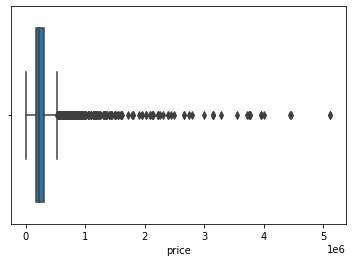

In [83]:
sns.boxplot(y)

In [84]:
X["price_currency"].value_counts()

2    132295
0       192
1       191
3        39
Name: price_currency, dtype: int64

In [104]:
y.iloc[6820]

255000.0

In [90]:
X.drop("price_currency", axis=1, inplace=True)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [93]:
x_train

,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type
205054,0,1,21,4,6,13,4,90.0,8
379947,0,1,86,2,4,34,1,130.0,8
391650,0,1,26,2,4,34,4,85.0,8
101866,0,1,30,0,4,34,6,125.0,8
6820,0,2,72,0,4,11,4,130.0,4
...,...,...,...,...,...,...,...,...,...
14005,0,1,100,0,5,15,4,110.0,4
6519,0,1,56,0,5,14,4,75.0,15
301521,0,1,39,3,15,24,1,68.0,11
236337,0,1,90,8,5,14,4,85.0,8


In [97]:
pd.merge(x_train, y_train, how='outer', left_index=True, right_index=True, indicator=True)

,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,_merge
205054,0,1,21,4,6,13,4,90.0,8,180000.0,both
379947,0,1,86,2,4,34,1,130.0,8,140000.0,both
391650,0,1,26,2,4,34,4,85.0,8,300000.0,both
101866,0,1,30,0,4,34,6,125.0,8,460000.0,both
6820,0,2,72,0,4,11,4,130.0,4,11000.0,both
...,...,...,...,...,...,...,...,...,...,...,...
14005,0,1,100,0,5,15,4,110.0,4,330000.0,both
6519,0,1,56,0,5,14,4,75.0,15,189000.0,both
301521,0,1,39,3,15,24,1,68.0,11,450000.0,both
236337,0,1,90,8,5,14,4,85.0,8,460000.0,both


In [88]:
y_train.value_counts()

250000.0    1820
350000.0    1693
210000.0    1590
175000.0    1509
185000.0    1495
            ... 
75500.0        1
205061.0       1
333500.0       1
299100.0       1
123665.0       1
Name: price, Length: 1414, dtype: int64

In [86]:
x_train.shape, y_train.shape

((92901, 10), (92901,))

In [87]:
model = LinearRegression()

In [88]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
y_pred = model.predict(x_test)

In [90]:
mae = mean_absolute_error(y_test, y_pred)

In [91]:
mae

72257.22087177764

In [92]:
r2_score(y_test, y_pred)

0.323493292238219

In [93]:
from xgboost import XGBRegressor

In [94]:
model = XGBRegressor(n_estimators = 300, learning_rate = 0.01)

In [95]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [96]:
y_pred = model.predict(x_test)

In [97]:
mae = mean_absolute_error(y_test, y_pred)

In [98]:
mae

66715.35183082653

In [99]:
r2_score(y_test, y_pred)

0.4594196375482872

In [100]:
from lightgbm import LGBMRegressor

In [101]:
lgbm = LGBMRegressor(n_estimators=300, learning_rate=0.1)

In [102]:
lgbm.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=300, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [103]:
y_pred = lgbm.predict(x_test)

In [104]:
mean_absolute_error(y_test, y_pred)

61883.380038802265

In [105]:
r2_score(y_test, y_pred)

0.5222910240409554

In [106]:
from catboost import CatBoostRegressor

In [107]:
cb_regr = CatBoostRegressor(iterations=5000)

In [108]:
cb_regr.fit(x_train, y_train)

Learning rate set to 0.025733
0:	learn: 123436.8555038	total: 173ms	remaining: 14m 23s
1:	learn: 122334.7771281	total: 181ms	remaining: 7m 32s
2:	learn: 121274.1083053	total: 188ms	remaining: 5m 13s
3:	learn: 120252.0086440	total: 195ms	remaining: 4m 4s
4:	learn: 119265.6074804	total: 204ms	remaining: 3m 23s
5:	learn: 118319.0203349	total: 210ms	remaining: 2m 54s
6:	learn: 117418.5388915	total: 217ms	remaining: 2m 34s
7:	learn: 116560.8855228	total: 224ms	remaining: 2m 19s
8:	learn: 115705.6368266	total: 230ms	remaining: 2m 7s
9:	learn: 114906.2872783	total: 236ms	remaining: 1m 57s
10:	learn: 114126.5576970	total: 242ms	remaining: 1m 49s
11:	learn: 113364.9838309	total: 249ms	remaining: 1m 43s
12:	learn: 112647.4839719	total: 255ms	remaining: 1m 37s
13:	learn: 111955.0948286	total: 260ms	remaining: 1m 32s
14:	learn: 111263.9681532	total: 267ms	remaining: 1m 28s
15:	learn: 110626.3648154	total: 273ms	remaining: 1m 25s
16:	learn: 110036.6459382	total: 279ms	remaining: 1m 21s
17:	learn: 1

164:	learn: 90346.2142788	total: 1.23s	remaining: 36.2s
165:	learn: 90310.3482986	total: 1.24s	remaining: 36.2s
166:	learn: 90275.4325600	total: 1.25s	remaining: 36.1s
167:	learn: 90237.9337592	total: 1.25s	remaining: 36.1s
168:	learn: 90205.7199821	total: 1.26s	remaining: 36.1s
169:	learn: 90152.4086560	total: 1.27s	remaining: 36.1s
170:	learn: 90120.6524091	total: 1.28s	remaining: 36.1s
171:	learn: 90067.8510816	total: 1.29s	remaining: 36.1s
172:	learn: 90034.4375713	total: 1.29s	remaining: 36.1s
173:	learn: 89998.5662870	total: 1.3s	remaining: 36.2s
174:	learn: 89970.9887305	total: 1.31s	remaining: 36.2s
175:	learn: 89945.4580785	total: 1.32s	remaining: 36.2s
176:	learn: 89903.2976721	total: 1.33s	remaining: 36.2s
177:	learn: 89877.4297116	total: 1.34s	remaining: 36.2s
178:	learn: 89851.3764047	total: 1.34s	remaining: 36.2s
179:	learn: 89826.6999940	total: 1.35s	remaining: 36.2s
180:	learn: 89798.3037353	total: 1.36s	remaining: 36.2s
181:	learn: 89769.3697512	total: 1.37s	remaining:

313:	learn: 87089.5863212	total: 2.3s	remaining: 34.4s
314:	learn: 87068.0243815	total: 2.31s	remaining: 34.3s
315:	learn: 87059.6215314	total: 2.31s	remaining: 34.3s
316:	learn: 87037.2848038	total: 2.32s	remaining: 34.3s
317:	learn: 87011.7337082	total: 2.33s	remaining: 34.3s
318:	learn: 87001.6915286	total: 2.33s	remaining: 34.3s
319:	learn: 86986.9617847	total: 2.34s	remaining: 34.3s
320:	learn: 86974.4673712	total: 2.35s	remaining: 34.3s
321:	learn: 86965.4691408	total: 2.36s	remaining: 34.2s
322:	learn: 86950.7562422	total: 2.36s	remaining: 34.2s
323:	learn: 86939.2292626	total: 2.37s	remaining: 34.2s
324:	learn: 86913.0016232	total: 2.37s	remaining: 34.2s
325:	learn: 86890.1616800	total: 2.38s	remaining: 34.1s
326:	learn: 86876.2838125	total: 2.39s	remaining: 34.1s
327:	learn: 86867.7136983	total: 2.39s	remaining: 34.1s
328:	learn: 86853.1534032	total: 2.4s	remaining: 34.1s
329:	learn: 86839.8929887	total: 2.41s	remaining: 34.1s
330:	learn: 86827.5029804	total: 2.41s	remaining: 

481:	learn: 85093.9773753	total: 3.36s	remaining: 31.5s
482:	learn: 85086.9865195	total: 3.37s	remaining: 31.5s
483:	learn: 85071.1635419	total: 3.38s	remaining: 31.5s
484:	learn: 85044.0304700	total: 3.38s	remaining: 31.5s
485:	learn: 85034.2444774	total: 3.39s	remaining: 31.5s
486:	learn: 85017.8270335	total: 3.4s	remaining: 31.5s
487:	learn: 85009.8238832	total: 3.4s	remaining: 31.5s
488:	learn: 84991.2374324	total: 3.41s	remaining: 31.5s
489:	learn: 84977.5055886	total: 3.42s	remaining: 31.5s
490:	learn: 84971.7340350	total: 3.42s	remaining: 31.4s
491:	learn: 84963.5497090	total: 3.43s	remaining: 31.4s
492:	learn: 84955.2310707	total: 3.44s	remaining: 31.4s
493:	learn: 84949.2468247	total: 3.44s	remaining: 31.4s
494:	learn: 84937.3908805	total: 3.45s	remaining: 31.4s
495:	learn: 84919.2305116	total: 3.45s	remaining: 31.4s
496:	learn: 84909.9956733	total: 3.46s	remaining: 31.4s
497:	learn: 84901.6926161	total: 3.47s	remaining: 31.3s
498:	learn: 84896.4801025	total: 3.47s	remaining: 

656:	learn: 83738.3021963	total: 4.42s	remaining: 29.2s
657:	learn: 83732.6373981	total: 4.43s	remaining: 29.2s
658:	learn: 83727.8357260	total: 4.43s	remaining: 29.2s
659:	learn: 83720.1440792	total: 4.44s	remaining: 29.2s
660:	learn: 83706.8142774	total: 4.45s	remaining: 29.2s
661:	learn: 83702.9142153	total: 4.45s	remaining: 29.2s
662:	learn: 83686.6447023	total: 4.46s	remaining: 29.2s
663:	learn: 83682.1731552	total: 4.46s	remaining: 29.2s
664:	learn: 83673.7886842	total: 4.47s	remaining: 29.1s
665:	learn: 83664.7849147	total: 4.47s	remaining: 29.1s
666:	learn: 83660.8784437	total: 4.48s	remaining: 29.1s
667:	learn: 83654.1921018	total: 4.49s	remaining: 29.1s
668:	learn: 83650.6991276	total: 4.49s	remaining: 29.1s
669:	learn: 83646.0243695	total: 4.5s	remaining: 29.1s
670:	learn: 83641.8389417	total: 4.5s	remaining: 29.1s
671:	learn: 83636.3828576	total: 4.51s	remaining: 29s
672:	learn: 83629.4921875	total: 4.51s	remaining: 29s
673:	learn: 83624.9055590	total: 4.52s	remaining: 29s


823:	learn: 82690.1624180	total: 5.49s	remaining: 27.8s
824:	learn: 82686.9255139	total: 5.5s	remaining: 27.8s
825:	learn: 82683.7954377	total: 5.5s	remaining: 27.8s
826:	learn: 82680.0568949	total: 5.51s	remaining: 27.8s
827:	learn: 82674.8799451	total: 5.52s	remaining: 27.8s
828:	learn: 82668.9423662	total: 5.53s	remaining: 27.8s
829:	learn: 82661.9681309	total: 5.54s	remaining: 27.8s
830:	learn: 82658.1928937	total: 5.54s	remaining: 27.8s
831:	learn: 82653.2725265	total: 5.55s	remaining: 27.8s
832:	learn: 82647.3787236	total: 5.56s	remaining: 27.8s
833:	learn: 82643.5233389	total: 5.57s	remaining: 27.8s
834:	learn: 82635.3814683	total: 5.58s	remaining: 27.8s
835:	learn: 82627.1413820	total: 5.58s	remaining: 27.8s
836:	learn: 82623.0397460	total: 5.59s	remaining: 27.8s
837:	learn: 82619.0694260	total: 5.6s	remaining: 27.8s
838:	learn: 82614.1244186	total: 5.61s	remaining: 27.8s
839:	learn: 82603.7429488	total: 5.62s	remaining: 27.8s
840:	learn: 82598.4725724	total: 5.63s	remaining: 2

987:	learn: 81869.4306489	total: 6.74s	remaining: 27.4s
988:	learn: 81865.1254453	total: 6.75s	remaining: 27.4s
989:	learn: 81862.1439903	total: 6.75s	remaining: 27.4s
990:	learn: 81858.0411714	total: 6.76s	remaining: 27.4s
991:	learn: 81854.8039846	total: 6.77s	remaining: 27.3s
992:	learn: 81850.5173300	total: 6.78s	remaining: 27.3s
993:	learn: 81848.0037406	total: 6.78s	remaining: 27.3s
994:	learn: 81845.3799674	total: 6.79s	remaining: 27.3s
995:	learn: 81840.1322863	total: 6.8s	remaining: 27.3s
996:	learn: 81837.4220825	total: 6.8s	remaining: 27.3s
997:	learn: 81828.0033068	total: 6.81s	remaining: 27.3s
998:	learn: 81825.1165204	total: 6.82s	remaining: 27.3s
999:	learn: 81822.8516182	total: 6.83s	remaining: 27.3s
1000:	learn: 81818.4762025	total: 6.83s	remaining: 27.3s
1001:	learn: 81815.9286288	total: 6.84s	remaining: 27.3s
1002:	learn: 81812.5165669	total: 6.85s	remaining: 27.3s
1003:	learn: 81807.9761828	total: 6.86s	remaining: 27.3s
1004:	learn: 81803.3976247	total: 6.86s	remain

1153:	learn: 81258.5784347	total: 7.98s	remaining: 26.6s
1154:	learn: 81254.5588798	total: 7.98s	remaining: 26.6s
1155:	learn: 81250.8303392	total: 7.99s	remaining: 26.6s
1156:	learn: 81247.2740192	total: 8s	remaining: 26.6s
1157:	learn: 81241.4403881	total: 8.01s	remaining: 26.6s
1158:	learn: 81237.5513934	total: 8.02s	remaining: 26.6s
1159:	learn: 81234.9062940	total: 8.02s	remaining: 26.6s
1160:	learn: 81232.5459659	total: 8.03s	remaining: 26.6s
1161:	learn: 81226.0981448	total: 8.04s	remaining: 26.5s
1162:	learn: 81221.5307226	total: 8.05s	remaining: 26.5s
1163:	learn: 81217.9338532	total: 8.05s	remaining: 26.5s
1164:	learn: 81215.1705856	total: 8.06s	remaining: 26.5s
1165:	learn: 81211.5955808	total: 8.07s	remaining: 26.5s
1166:	learn: 81208.8571044	total: 8.08s	remaining: 26.5s
1167:	learn: 81206.8608053	total: 8.09s	remaining: 26.5s
1168:	learn: 81204.3054312	total: 8.1s	remaining: 26.5s
1169:	learn: 81201.7818349	total: 8.1s	remaining: 26.5s
1170:	learn: 81198.2169535	total: 8.

1321:	learn: 80748.2339438	total: 9.23s	remaining: 25.7s
1322:	learn: 80744.0514056	total: 9.24s	remaining: 25.7s
1323:	learn: 80741.4581670	total: 9.24s	remaining: 25.7s
1324:	learn: 80737.7939121	total: 9.26s	remaining: 25.7s
1325:	learn: 80735.9387385	total: 9.27s	remaining: 25.7s
1326:	learn: 80733.3714519	total: 9.27s	remaining: 25.7s
1327:	learn: 80730.2535175	total: 9.28s	remaining: 25.7s
1328:	learn: 80727.2706693	total: 9.29s	remaining: 25.6s
1329:	learn: 80725.1840135	total: 9.29s	remaining: 25.6s
1330:	learn: 80722.8399732	total: 9.3s	remaining: 25.6s
1331:	learn: 80720.1197372	total: 9.31s	remaining: 25.6s
1332:	learn: 80717.2494320	total: 9.31s	remaining: 25.6s
1333:	learn: 80713.5586537	total: 9.32s	remaining: 25.6s
1334:	learn: 80710.6595257	total: 9.33s	remaining: 25.6s
1335:	learn: 80709.0111807	total: 9.33s	remaining: 25.6s
1336:	learn: 80705.1996871	total: 9.34s	remaining: 25.6s
1337:	learn: 80702.8737778	total: 9.35s	remaining: 25.6s
1338:	learn: 80699.9431016	total

1471:	learn: 80335.9545688	total: 10.3s	remaining: 24.7s
1472:	learn: 80332.6937735	total: 10.3s	remaining: 24.7s
1473:	learn: 80329.1666389	total: 10.3s	remaining: 24.7s
1474:	learn: 80324.8494918	total: 10.3s	remaining: 24.6s
1475:	learn: 80322.8841692	total: 10.3s	remaining: 24.6s
1476:	learn: 80320.3624491	total: 10.3s	remaining: 24.6s
1477:	learn: 80319.1371816	total: 10.3s	remaining: 24.6s
1478:	learn: 80316.9914031	total: 10.3s	remaining: 24.6s
1479:	learn: 80313.8547827	total: 10.3s	remaining: 24.6s
1480:	learn: 80310.6699208	total: 10.4s	remaining: 24.6s
1481:	learn: 80309.3048152	total: 10.4s	remaining: 24.6s
1482:	learn: 80308.0427220	total: 10.4s	remaining: 24.6s
1483:	learn: 80305.8698297	total: 10.4s	remaining: 24.6s
1484:	learn: 80303.6807149	total: 10.4s	remaining: 24.6s
1485:	learn: 80300.0338620	total: 10.4s	remaining: 24.6s
1486:	learn: 80299.0352198	total: 10.4s	remaining: 24.6s
1487:	learn: 80296.3526143	total: 10.4s	remaining: 24.5s
1488:	learn: 80293.4267742	tota

1632:	learn: 79953.0256695	total: 11.4s	remaining: 23.4s
1633:	learn: 79950.7175950	total: 11.4s	remaining: 23.4s
1634:	learn: 79948.6073495	total: 11.4s	remaining: 23.4s
1635:	learn: 79945.7368850	total: 11.4s	remaining: 23.4s
1636:	learn: 79942.8385288	total: 11.4s	remaining: 23.4s
1637:	learn: 79940.6666318	total: 11.4s	remaining: 23.4s
1638:	learn: 79938.9861851	total: 11.4s	remaining: 23.4s
1639:	learn: 79937.7669777	total: 11.4s	remaining: 23.4s
1640:	learn: 79935.2338968	total: 11.4s	remaining: 23.3s
1641:	learn: 79932.1622658	total: 11.4s	remaining: 23.3s
1642:	learn: 79930.6812834	total: 11.4s	remaining: 23.3s
1643:	learn: 79929.0862651	total: 11.4s	remaining: 23.3s
1644:	learn: 79926.6645569	total: 11.4s	remaining: 23.3s
1645:	learn: 79924.0471211	total: 11.4s	remaining: 23.3s
1646:	learn: 79922.3327606	total: 11.4s	remaining: 23.3s
1647:	learn: 79921.0105912	total: 11.5s	remaining: 23.3s
1648:	learn: 79918.4196559	total: 11.5s	remaining: 23.3s
1649:	learn: 79916.1956533	tota

1782:	learn: 79649.6098724	total: 12.4s	remaining: 22.4s
1783:	learn: 79648.2757918	total: 12.4s	remaining: 22.4s
1784:	learn: 79645.4942566	total: 12.4s	remaining: 22.4s
1785:	learn: 79644.3262562	total: 12.4s	remaining: 22.4s
1786:	learn: 79640.8193178	total: 12.4s	remaining: 22.4s
1787:	learn: 79639.2740954	total: 12.5s	remaining: 22.4s
1788:	learn: 79636.2423161	total: 12.5s	remaining: 22.4s
1789:	learn: 79633.6710668	total: 12.5s	remaining: 22.4s
1790:	learn: 79631.7319107	total: 12.5s	remaining: 22.4s
1791:	learn: 79629.3093524	total: 12.5s	remaining: 22.4s
1792:	learn: 79626.6679885	total: 12.5s	remaining: 22.3s
1793:	learn: 79625.0469392	total: 12.5s	remaining: 22.3s
1794:	learn: 79619.8020478	total: 12.5s	remaining: 22.3s
1795:	learn: 79617.9643070	total: 12.5s	remaining: 22.3s
1796:	learn: 79616.8891741	total: 12.5s	remaining: 22.3s
1797:	learn: 79614.5980807	total: 12.5s	remaining: 22.3s
1798:	learn: 79613.6500246	total: 12.5s	remaining: 22.3s
1799:	learn: 79610.9531569	tota

1945:	learn: 79348.3466102	total: 13.7s	remaining: 21.4s
1946:	learn: 79347.3120927	total: 13.7s	remaining: 21.4s
1947:	learn: 79345.5495415	total: 13.7s	remaining: 21.4s
1948:	learn: 79344.5721757	total: 13.7s	remaining: 21.4s
1949:	learn: 79343.8876950	total: 13.7s	remaining: 21.4s
1950:	learn: 79341.2051015	total: 13.7s	remaining: 21.4s
1951:	learn: 79339.1632089	total: 13.7s	remaining: 21.4s
1952:	learn: 79337.5913444	total: 13.7s	remaining: 21.4s
1953:	learn: 79336.3734848	total: 13.7s	remaining: 21.4s
1954:	learn: 79334.2556134	total: 13.7s	remaining: 21.4s
1955:	learn: 79332.6418341	total: 13.7s	remaining: 21.4s
1956:	learn: 79331.2189107	total: 13.7s	remaining: 21.4s
1957:	learn: 79330.6005023	total: 13.8s	remaining: 21.4s
1958:	learn: 79328.4183876	total: 13.8s	remaining: 21.4s
1959:	learn: 79326.5784357	total: 13.8s	remaining: 21.4s
1960:	learn: 79325.5809957	total: 13.8s	remaining: 21.4s
1961:	learn: 79324.1937873	total: 13.8s	remaining: 21.3s
1962:	learn: 79322.4013189	tota

2090:	learn: 79103.6003987	total: 14.7s	remaining: 20.5s
2091:	learn: 79101.4938385	total: 14.7s	remaining: 20.5s
2092:	learn: 79099.2280881	total: 14.7s	remaining: 20.5s
2093:	learn: 79097.2249449	total: 14.8s	remaining: 20.5s
2094:	learn: 79096.0293541	total: 14.8s	remaining: 20.5s
2095:	learn: 79093.5212022	total: 14.8s	remaining: 20.5s
2096:	learn: 79091.6617908	total: 14.8s	remaining: 20.5s
2097:	learn: 79090.2189609	total: 14.8s	remaining: 20.5s
2098:	learn: 79089.2701121	total: 14.8s	remaining: 20.4s
2099:	learn: 79088.2881104	total: 14.8s	remaining: 20.4s
2100:	learn: 79086.8199845	total: 14.8s	remaining: 20.4s
2101:	learn: 79084.7458935	total: 14.8s	remaining: 20.4s
2102:	learn: 79082.9970847	total: 14.8s	remaining: 20.4s
2103:	learn: 79081.1574516	total: 14.8s	remaining: 20.4s
2104:	learn: 79079.8794575	total: 14.8s	remaining: 20.4s
2105:	learn: 79078.1920878	total: 14.8s	remaining: 20.4s
2106:	learn: 79076.1907869	total: 14.9s	remaining: 20.4s
2107:	learn: 79075.2702681	tota

2238:	learn: 78861.5655905	total: 15.8s	remaining: 19.5s
2239:	learn: 78860.6541365	total: 15.8s	remaining: 19.5s
2240:	learn: 78858.3399180	total: 15.8s	remaining: 19.5s
2241:	learn: 78856.7656063	total: 15.8s	remaining: 19.5s
2242:	learn: 78855.9965023	total: 15.8s	remaining: 19.5s
2243:	learn: 78855.1257495	total: 15.8s	remaining: 19.5s
2244:	learn: 78852.7572396	total: 15.8s	remaining: 19.4s
2245:	learn: 78851.5098298	total: 15.9s	remaining: 19.4s
2246:	learn: 78849.6956704	total: 15.9s	remaining: 19.4s
2247:	learn: 78847.7598355	total: 15.9s	remaining: 19.4s
2248:	learn: 78846.6378028	total: 15.9s	remaining: 19.4s
2249:	learn: 78845.0250171	total: 15.9s	remaining: 19.4s
2250:	learn: 78842.3713575	total: 15.9s	remaining: 19.4s
2251:	learn: 78841.4635959	total: 15.9s	remaining: 19.4s
2252:	learn: 78840.4628285	total: 15.9s	remaining: 19.4s
2253:	learn: 78839.3001664	total: 15.9s	remaining: 19.4s
2254:	learn: 78838.1240782	total: 15.9s	remaining: 19.4s
2255:	learn: 78836.2575340	tota

2386:	learn: 78640.3222643	total: 16.9s	remaining: 18.5s
2387:	learn: 78638.7168123	total: 16.9s	remaining: 18.4s
2388:	learn: 78637.6302806	total: 16.9s	remaining: 18.4s
2389:	learn: 78636.2427854	total: 16.9s	remaining: 18.4s
2390:	learn: 78635.1138433	total: 16.9s	remaining: 18.4s
2391:	learn: 78633.8360125	total: 16.9s	remaining: 18.4s
2392:	learn: 78632.0846239	total: 16.9s	remaining: 18.4s
2393:	learn: 78629.8782836	total: 16.9s	remaining: 18.4s
2394:	learn: 78628.9342912	total: 16.9s	remaining: 18.4s
2395:	learn: 78626.4841153	total: 16.9s	remaining: 18.4s
2396:	learn: 78624.8926784	total: 16.9s	remaining: 18.4s
2397:	learn: 78623.0733245	total: 16.9s	remaining: 18.4s
2398:	learn: 78621.7906474	total: 16.9s	remaining: 18.4s
2399:	learn: 78619.3603217	total: 16.9s	remaining: 18.4s
2400:	learn: 78617.8014263	total: 17s	remaining: 18.4s
2401:	learn: 78614.9038686	total: 17s	remaining: 18.3s
2402:	learn: 78613.3357021	total: 17s	remaining: 18.3s
2403:	learn: 78611.1943558	total: 17s

2547:	learn: 78420.1797888	total: 17.9s	remaining: 17.2s
2548:	learn: 78418.5141295	total: 17.9s	remaining: 17.2s
2549:	learn: 78417.0295830	total: 17.9s	remaining: 17.2s
2550:	learn: 78416.0246189	total: 17.9s	remaining: 17.2s
2551:	learn: 78414.6870910	total: 17.9s	remaining: 17.2s
2552:	learn: 78411.7252557	total: 18s	remaining: 17.2s
2553:	learn: 78411.2434355	total: 18s	remaining: 17.2s
2554:	learn: 78409.5001505	total: 18s	remaining: 17.2s
2555:	learn: 78408.3395056	total: 18s	remaining: 17.2s
2556:	learn: 78406.6377132	total: 18s	remaining: 17.2s
2557:	learn: 78404.2042375	total: 18s	remaining: 17.2s
2558:	learn: 78403.2583293	total: 18s	remaining: 17.2s
2559:	learn: 78400.9337571	total: 18s	remaining: 17.2s
2560:	learn: 78399.3104789	total: 18s	remaining: 17.2s
2561:	learn: 78396.6889648	total: 18s	remaining: 17.1s
2562:	learn: 78394.5087562	total: 18s	remaining: 17.1s
2563:	learn: 78391.8500039	total: 18s	remaining: 17.1s
2564:	learn: 78390.5396562	total: 18s	remaining: 17.1s


2697:	learn: 78215.7817312	total: 19s	remaining: 16.2s
2698:	learn: 78214.4815283	total: 19s	remaining: 16.2s
2699:	learn: 78212.6522804	total: 19s	remaining: 16.2s
2700:	learn: 78211.0982018	total: 19s	remaining: 16.2s
2701:	learn: 78210.2192261	total: 19s	remaining: 16.2s
2702:	learn: 78209.6514067	total: 19s	remaining: 16.2s
2703:	learn: 78208.3846359	total: 19s	remaining: 16.2s
2704:	learn: 78207.3576969	total: 19s	remaining: 16.2s
2705:	learn: 78206.0567512	total: 19s	remaining: 16.1s
2706:	learn: 78204.8891166	total: 19.1s	remaining: 16.1s
2707:	learn: 78202.8476769	total: 19.1s	remaining: 16.1s
2708:	learn: 78201.8499085	total: 19.1s	remaining: 16.1s
2709:	learn: 78200.5615579	total: 19.1s	remaining: 16.1s
2710:	learn: 78199.5937474	total: 19.1s	remaining: 16.1s
2711:	learn: 78197.9225277	total: 19.1s	remaining: 16.1s
2712:	learn: 78195.9627956	total: 19.1s	remaining: 16.1s
2713:	learn: 78193.4660741	total: 19.1s	remaining: 16.1s
2714:	learn: 78192.4694000	total: 19.1s	remaining

2865:	learn: 78007.3271631	total: 20.2s	remaining: 15.1s
2866:	learn: 78006.1566719	total: 20.2s	remaining: 15.1s
2867:	learn: 78004.8329875	total: 20.2s	remaining: 15.1s
2868:	learn: 78003.9817914	total: 20.3s	remaining: 15s
2869:	learn: 78003.2368508	total: 20.3s	remaining: 15s
2870:	learn: 78002.3569546	total: 20.3s	remaining: 15s
2871:	learn: 78001.3922798	total: 20.3s	remaining: 15s
2872:	learn: 78000.4734301	total: 20.3s	remaining: 15s
2873:	learn: 77999.7387301	total: 20.3s	remaining: 15s
2874:	learn: 77996.8421105	total: 20.3s	remaining: 15s
2875:	learn: 77995.3147578	total: 20.3s	remaining: 15s
2876:	learn: 77993.9519713	total: 20.3s	remaining: 15s
2877:	learn: 77992.8819917	total: 20.3s	remaining: 15s
2878:	learn: 77992.0052948	total: 20.3s	remaining: 15s
2879:	learn: 77990.5463345	total: 20.3s	remaining: 15s
2880:	learn: 77989.3288684	total: 20.3s	remaining: 15s
2881:	learn: 77988.3606932	total: 20.4s	remaining: 15s
2882:	learn: 77987.1653722	total: 20.4s	remaining: 14.9s
28

3011:	learn: 77827.6224379	total: 21.3s	remaining: 14.1s
3012:	learn: 77826.5201526	total: 21.3s	remaining: 14.1s
3013:	learn: 77825.5782273	total: 21.3s	remaining: 14s
3014:	learn: 77824.4913314	total: 21.3s	remaining: 14s
3015:	learn: 77822.6249630	total: 21.3s	remaining: 14s
3016:	learn: 77821.1453828	total: 21.3s	remaining: 14s
3017:	learn: 77820.1991930	total: 21.3s	remaining: 14s
3018:	learn: 77819.3969214	total: 21.4s	remaining: 14s
3019:	learn: 77817.8360630	total: 21.4s	remaining: 14s
3020:	learn: 77816.1915945	total: 21.4s	remaining: 14s
3021:	learn: 77814.8720897	total: 21.4s	remaining: 14s
3022:	learn: 77814.7015615	total: 21.4s	remaining: 14s
3023:	learn: 77813.3756872	total: 21.4s	remaining: 14s
3024:	learn: 77812.8681331	total: 21.4s	remaining: 14s
3025:	learn: 77811.8954715	total: 21.4s	remaining: 14s
3026:	learn: 77810.9446419	total: 21.4s	remaining: 14s
3027:	learn: 77809.9164400	total: 21.4s	remaining: 14s
3028:	learn: 77809.2132317	total: 21.4s	remaining: 13.9s
3029

3177:	learn: 77639.1078540	total: 22.5s	remaining: 12.9s
3178:	learn: 77637.6771157	total: 22.6s	remaining: 12.9s
3179:	learn: 77636.5831014	total: 22.6s	remaining: 12.9s
3180:	learn: 77635.6410149	total: 22.6s	remaining: 12.9s
3181:	learn: 77634.7007269	total: 22.6s	remaining: 12.9s
3182:	learn: 77633.8300758	total: 22.6s	remaining: 12.9s
3183:	learn: 77633.2028363	total: 22.6s	remaining: 12.9s
3184:	learn: 77632.3489360	total: 22.6s	remaining: 12.9s
3185:	learn: 77631.5549150	total: 22.6s	remaining: 12.9s
3186:	learn: 77630.7182288	total: 22.6s	remaining: 12.9s
3187:	learn: 77629.6173202	total: 22.6s	remaining: 12.9s
3188:	learn: 77628.3381093	total: 22.6s	remaining: 12.8s
3189:	learn: 77627.1917065	total: 22.6s	remaining: 12.8s
3190:	learn: 77625.5268644	total: 22.6s	remaining: 12.8s
3191:	learn: 77624.5096918	total: 22.6s	remaining: 12.8s
3192:	learn: 77623.5056700	total: 22.7s	remaining: 12.8s
3193:	learn: 77622.4270960	total: 22.7s	remaining: 12.8s
3194:	learn: 77621.4751418	tota

3328:	learn: 77479.9878061	total: 23.6s	remaining: 11.9s
3329:	learn: 77478.3751608	total: 23.6s	remaining: 11.8s
3330:	learn: 77476.8385998	total: 23.6s	remaining: 11.8s
3331:	learn: 77475.2731786	total: 23.6s	remaining: 11.8s
3332:	learn: 77474.6044866	total: 23.6s	remaining: 11.8s
3333:	learn: 77474.0310271	total: 23.7s	remaining: 11.8s
3334:	learn: 77472.8581970	total: 23.7s	remaining: 11.8s
3335:	learn: 77471.9665892	total: 23.7s	remaining: 11.8s
3336:	learn: 77470.8780021	total: 23.7s	remaining: 11.8s
3337:	learn: 77470.1917002	total: 23.7s	remaining: 11.8s
3338:	learn: 77469.7018900	total: 23.7s	remaining: 11.8s
3339:	learn: 77468.1929634	total: 23.7s	remaining: 11.8s
3340:	learn: 77467.3286245	total: 23.7s	remaining: 11.8s
3341:	learn: 77465.9967293	total: 23.7s	remaining: 11.8s
3342:	learn: 77465.1302988	total: 23.7s	remaining: 11.8s
3343:	learn: 77463.9925373	total: 23.7s	remaining: 11.7s
3344:	learn: 77463.3451392	total: 23.7s	remaining: 11.7s
3345:	learn: 77462.3762510	tota

3491:	learn: 77309.0913283	total: 24.7s	remaining: 10.7s
3492:	learn: 77308.4414141	total: 24.7s	remaining: 10.6s
3493:	learn: 77307.1584474	total: 24.7s	remaining: 10.6s
3494:	learn: 77305.3846199	total: 24.7s	remaining: 10.6s
3495:	learn: 77303.9250458	total: 24.7s	remaining: 10.6s
3496:	learn: 77303.2913748	total: 24.7s	remaining: 10.6s
3497:	learn: 77302.7123480	total: 24.7s	remaining: 10.6s
3498:	learn: 77301.1402212	total: 24.7s	remaining: 10.6s
3499:	learn: 77300.0742717	total: 24.7s	remaining: 10.6s
3500:	learn: 77299.4318377	total: 24.7s	remaining: 10.6s
3501:	learn: 77298.3085361	total: 24.7s	remaining: 10.6s
3502:	learn: 77296.8274899	total: 24.7s	remaining: 10.6s
3503:	learn: 77295.9576298	total: 24.8s	remaining: 10.6s
3504:	learn: 77295.2185642	total: 24.8s	remaining: 10.6s
3505:	learn: 77293.9411525	total: 24.8s	remaining: 10.6s
3506:	learn: 77293.3007240	total: 24.8s	remaining: 10.5s
3507:	learn: 77292.0558590	total: 24.8s	remaining: 10.5s
3508:	learn: 77291.5352946	tota

3637:	learn: 77160.5850405	total: 25.7s	remaining: 9.64s
3638:	learn: 77159.3670093	total: 25.7s	remaining: 9.63s
3639:	learn: 77158.8609658	total: 25.8s	remaining: 9.62s
3640:	learn: 77157.7233644	total: 25.8s	remaining: 9.62s
3641:	learn: 77157.3545037	total: 25.8s	remaining: 9.61s
3642:	learn: 77156.2041449	total: 25.8s	remaining: 9.6s
3643:	learn: 77155.4032776	total: 25.8s	remaining: 9.6s
3644:	learn: 77153.3785985	total: 25.8s	remaining: 9.59s
3645:	learn: 77152.1686545	total: 25.8s	remaining: 9.58s
3646:	learn: 77151.1141117	total: 25.8s	remaining: 9.57s
3647:	learn: 77150.0857896	total: 25.8s	remaining: 9.57s
3648:	learn: 77148.9885195	total: 25.8s	remaining: 9.56s
3649:	learn: 77148.2104799	total: 25.8s	remaining: 9.55s
3650:	learn: 77147.8307208	total: 25.8s	remaining: 9.55s
3651:	learn: 77147.5646120	total: 25.8s	remaining: 9.54s
3652:	learn: 77146.5371283	total: 25.9s	remaining: 9.53s
3653:	learn: 77145.2814686	total: 25.9s	remaining: 9.53s
3654:	learn: 77144.3810056	total:

3805:	learn: 77000.6998142	total: 27s	remaining: 8.46s
3806:	learn: 76999.4650512	total: 27s	remaining: 8.46s
3807:	learn: 76998.4501381	total: 27s	remaining: 8.45s
3808:	learn: 76997.2753748	total: 27s	remaining: 8.44s
3809:	learn: 76996.3771527	total: 27s	remaining: 8.44s
3810:	learn: 76995.2962743	total: 27s	remaining: 8.43s
3811:	learn: 76994.3002797	total: 27s	remaining: 8.42s
3812:	learn: 76993.9847554	total: 27s	remaining: 8.42s
3813:	learn: 76993.3531321	total: 27s	remaining: 8.41s
3814:	learn: 76992.1371835	total: 27s	remaining: 8.4s
3815:	learn: 76991.5609922	total: 27.1s	remaining: 8.39s
3816:	learn: 76990.8666358	total: 27.1s	remaining: 8.39s
3817:	learn: 76989.9747427	total: 27.1s	remaining: 8.38s
3818:	learn: 76989.1121177	total: 27.1s	remaining: 8.37s
3819:	learn: 76988.4819873	total: 27.1s	remaining: 8.37s
3820:	learn: 76987.3582897	total: 27.1s	remaining: 8.36s
3821:	learn: 76986.7418135	total: 27.1s	remaining: 8.35s
3822:	learn: 76985.1521063	total: 27.1s	remaining: 8

3950:	learn: 76870.2472692	total: 28.1s	remaining: 7.45s
3951:	learn: 76869.8031424	total: 28.1s	remaining: 7.44s
3952:	learn: 76869.3823860	total: 28.1s	remaining: 7.43s
3953:	learn: 76868.5098885	total: 28.1s	remaining: 7.43s
3954:	learn: 76866.4455047	total: 28.1s	remaining: 7.42s
3955:	learn: 76865.7962695	total: 28.1s	remaining: 7.41s
3956:	learn: 76865.0015642	total: 28.1s	remaining: 7.41s
3957:	learn: 76863.8807808	total: 28.1s	remaining: 7.4s
3958:	learn: 76862.5350017	total: 28.1s	remaining: 7.39s
3959:	learn: 76861.3162341	total: 28.1s	remaining: 7.38s
3960:	learn: 76860.5598105	total: 28.1s	remaining: 7.38s
3961:	learn: 76859.3345892	total: 28.1s	remaining: 7.37s
3962:	learn: 76858.9939426	total: 28.1s	remaining: 7.36s
3963:	learn: 76857.5069827	total: 28.1s	remaining: 7.36s
3964:	learn: 76856.5441516	total: 28.2s	remaining: 7.35s
3965:	learn: 76855.8200380	total: 28.2s	remaining: 7.34s
3966:	learn: 76855.3077431	total: 28.2s	remaining: 7.34s
3967:	learn: 76854.4608315	total

4099:	learn: 76735.8665784	total: 29.1s	remaining: 6.39s
4100:	learn: 76734.9853348	total: 29.1s	remaining: 6.38s
4101:	learn: 76733.4942926	total: 29.1s	remaining: 6.38s
4102:	learn: 76732.6030895	total: 29.1s	remaining: 6.37s
4103:	learn: 76732.3018909	total: 29.1s	remaining: 6.36s
4104:	learn: 76731.7932516	total: 29.2s	remaining: 6.36s
4105:	learn: 76731.1543401	total: 29.2s	remaining: 6.35s
4106:	learn: 76729.7967783	total: 29.2s	remaining: 6.34s
4107:	learn: 76728.9300138	total: 29.2s	remaining: 6.33s
4108:	learn: 76727.7070818	total: 29.2s	remaining: 6.33s
4109:	learn: 76726.7312946	total: 29.2s	remaining: 6.32s
4110:	learn: 76725.9192775	total: 29.2s	remaining: 6.31s
4111:	learn: 76725.1073226	total: 29.2s	remaining: 6.31s
4112:	learn: 76724.0902876	total: 29.2s	remaining: 6.3s
4113:	learn: 76723.1849816	total: 29.2s	remaining: 6.29s
4114:	learn: 76722.2563292	total: 29.2s	remaining: 6.29s
4115:	learn: 76720.8616298	total: 29.2s	remaining: 6.28s
4116:	learn: 76719.1971493	total

4251:	learn: 76592.0991897	total: 30.2s	remaining: 5.31s
4252:	learn: 76590.8323485	total: 30.2s	remaining: 5.3s
4253:	learn: 76589.9738113	total: 30.2s	remaining: 5.3s
4254:	learn: 76587.6704053	total: 30.2s	remaining: 5.29s
4255:	learn: 76586.9953299	total: 30.2s	remaining: 5.28s
4256:	learn: 76585.1264116	total: 30.2s	remaining: 5.27s
4257:	learn: 76584.1414333	total: 30.2s	remaining: 5.27s
4258:	learn: 76583.6029642	total: 30.2s	remaining: 5.26s
4259:	learn: 76582.8109491	total: 30.2s	remaining: 5.25s
4260:	learn: 76582.1277336	total: 30.2s	remaining: 5.25s
4261:	learn: 76580.5582505	total: 30.3s	remaining: 5.24s
4262:	learn: 76579.9675790	total: 30.3s	remaining: 5.23s
4263:	learn: 76578.5305528	total: 30.3s	remaining: 5.22s
4264:	learn: 76577.8271501	total: 30.3s	remaining: 5.22s
4265:	learn: 76577.0603645	total: 30.3s	remaining: 5.21s
4266:	learn: 76576.6584160	total: 30.3s	remaining: 5.2s
4267:	learn: 76575.8429539	total: 30.3s	remaining: 5.19s
4268:	learn: 76575.0790536	total: 

4417:	learn: 76445.1246821	total: 31.2s	remaining: 4.12s
4418:	learn: 76444.4441890	total: 31.3s	remaining: 4.11s
4419:	learn: 76443.7616134	total: 31.3s	remaining: 4.1s
4420:	learn: 76443.4170772	total: 31.3s	remaining: 4.09s
4421:	learn: 76442.5943499	total: 31.3s	remaining: 4.09s
4422:	learn: 76441.2641044	total: 31.3s	remaining: 4.08s
4423:	learn: 76439.9986535	total: 31.3s	remaining: 4.07s
4424:	learn: 76439.5664801	total: 31.3s	remaining: 4.07s
4425:	learn: 76439.3954683	total: 31.3s	remaining: 4.06s
4426:	learn: 76438.7684121	total: 31.3s	remaining: 4.05s
4427:	learn: 76438.0510175	total: 31.3s	remaining: 4.04s
4428:	learn: 76437.1276704	total: 31.3s	remaining: 4.04s
4429:	learn: 76436.5044848	total: 31.3s	remaining: 4.03s
4430:	learn: 76435.6220265	total: 31.3s	remaining: 4.02s
4431:	learn: 76434.3470940	total: 31.3s	remaining: 4.01s
4432:	learn: 76433.4461891	total: 31.3s	remaining: 4.01s
4433:	learn: 76432.5668766	total: 31.3s	remaining: 4s
4434:	learn: 76431.7441512	total: 3

4563:	learn: 76331.8165315	total: 32.3s	remaining: 3.09s
4564:	learn: 76330.8888451	total: 32.3s	remaining: 3.08s
4565:	learn: 76329.2734620	total: 32.3s	remaining: 3.07s
4566:	learn: 76328.6412125	total: 32.3s	remaining: 3.07s
4567:	learn: 76327.8111261	total: 32.3s	remaining: 3.06s
4568:	learn: 76326.6676981	total: 32.4s	remaining: 3.05s
4569:	learn: 76325.6465938	total: 32.4s	remaining: 3.04s
4570:	learn: 76324.8063372	total: 32.4s	remaining: 3.04s
4571:	learn: 76323.8238615	total: 32.4s	remaining: 3.03s
4572:	learn: 76323.3636140	total: 32.4s	remaining: 3.02s
4573:	learn: 76322.8027986	total: 32.4s	remaining: 3.02s
4574:	learn: 76322.0075852	total: 32.4s	remaining: 3.01s
4575:	learn: 76321.3852092	total: 32.4s	remaining: 3s
4576:	learn: 76320.5722196	total: 32.4s	remaining: 3s
4577:	learn: 76319.8439236	total: 32.4s	remaining: 2.99s
4578:	learn: 76318.3661465	total: 32.4s	remaining: 2.98s
4579:	learn: 76317.8188026	total: 32.4s	remaining: 2.98s
4580:	learn: 76316.6012476	total: 32.

4726:	learn: 76198.1366544	total: 33.6s	remaining: 1.94s
4727:	learn: 76197.4655643	total: 33.6s	remaining: 1.93s
4728:	learn: 76196.6773301	total: 33.6s	remaining: 1.92s
4729:	learn: 76195.6943682	total: 33.6s	remaining: 1.92s
4730:	learn: 76195.0180860	total: 33.6s	remaining: 1.91s
4731:	learn: 76193.9774309	total: 33.6s	remaining: 1.9s
4732:	learn: 76193.5341181	total: 33.6s	remaining: 1.9s
4733:	learn: 76192.4874601	total: 33.6s	remaining: 1.89s
4734:	learn: 76191.2357085	total: 33.6s	remaining: 1.88s
4735:	learn: 76189.9901136	total: 33.6s	remaining: 1.87s
4736:	learn: 76189.3757310	total: 33.6s	remaining: 1.87s
4737:	learn: 76188.0013243	total: 33.6s	remaining: 1.86s
4738:	learn: 76187.4716298	total: 33.7s	remaining: 1.85s
4739:	learn: 76186.6197526	total: 33.7s	remaining: 1.85s
4740:	learn: 76186.1751032	total: 33.7s	remaining: 1.84s
4741:	learn: 76185.4399764	total: 33.7s	remaining: 1.83s
4742:	learn: 76184.2041566	total: 33.7s	remaining: 1.82s
4743:	learn: 76183.7508698	total:

4888:	learn: 76064.1056799	total: 34.8s	remaining: 790ms
4889:	learn: 76063.0477275	total: 34.8s	remaining: 783ms
4890:	learn: 76062.5483000	total: 34.8s	remaining: 776ms
4891:	learn: 76061.2355156	total: 34.8s	remaining: 769ms
4892:	learn: 76060.6925337	total: 34.8s	remaining: 762ms
4893:	learn: 76059.2523304	total: 34.8s	remaining: 755ms
4894:	learn: 76058.4875967	total: 34.8s	remaining: 747ms
4895:	learn: 76057.0850750	total: 34.9s	remaining: 740ms
4896:	learn: 76056.8055664	total: 34.9s	remaining: 733ms
4897:	learn: 76055.8308145	total: 34.9s	remaining: 726ms
4898:	learn: 76055.3895425	total: 34.9s	remaining: 719ms
4899:	learn: 76054.4123971	total: 34.9s	remaining: 712ms
4900:	learn: 76053.6695677	total: 34.9s	remaining: 705ms
4901:	learn: 76052.9869660	total: 34.9s	remaining: 698ms
4902:	learn: 76052.5979215	total: 34.9s	remaining: 690ms
4903:	learn: 76051.9825204	total: 34.9s	remaining: 683ms
4904:	learn: 76050.7402136	total: 34.9s	remaining: 676ms
4905:	learn: 76049.9207799	tota

In [109]:
y_pred = cb_regr.predict(x_test)

In [110]:
mean_absolute_error(y_test, y_pred)

61551.120685752336

In [111]:
r2_score(y_test, y_pred)

0.5467209081256112

In [112]:
import joblib

In [113]:
joblib.dump(cb_regr, "model.pkl")

['model.pkl']

In [118]:
X.columns

Index(['sub_type', 'listing_type', 'tom', 'building_age', 'total_floor_count',
       'floor_no', 'room_count', 'size', 'heating_type', 'price_currency'],
      dtype='object')

In [122]:
l = np.array(["1", "2"], dtype = float)

In [123]:
l

array([1., 2.])

In [124]:
l[1]

2.0

In [84]:
df = pd.read_csv("real_estate_data.csv")

In [85]:
df.head()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
